# Import packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')
%matplotlib inline

# Import data to dataframe and inspect

In [2]:
df = pd.read_table('data/en.openfoodfacts.org.products.tsv',sep = '\t')
df.info()

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333824 entries, 0 to 333823
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 412.6+ MB


In [7]:
# inspect nutrition score column

df['nutrition-score-uk_100g'].describe()

count    232859.000000
mean          9.023169
std           9.173117
min         -15.000000
25%           1.000000
50%           9.000000
75%          16.000000
max          40.000000
Name: nutrition-score-uk_100g, dtype: float64

# Extract columns related to fat

In [84]:
fat_cols_bools = df.columns.str.contains('fat') | df.columns.str.contains('product_name')
fat_cols = df.columns[fat_cols_bools]
fat_cols

Index(['product_name', 'energy-from-fat_100g', 'fat_100g',
       'saturated-fat_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'omega-6-fat_100g',
       'omega-9-fat_100g', 'trans-fat_100g'],
      dtype='object')

In [89]:
# check fat data

df_fat = df[fat_cols]
df_fat.head()

,product_name,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,trans-fat_100g
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,28.57,28.57,NaN,NaN,NaN,NaN,NaN,0.0
2,Peanuts,NaN,17.86,0.00,NaN,NaN,NaN,NaN,NaN,0.0
3,Organic Salted Nut Mix,NaN,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Polenta,NaN,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Inspect to see how well populated fat data is for foods

In [91]:
df_fat.dropna(how='all').count()

product_name                316169
energy-from-fat_100g           858
fat_100g                    256087
saturated-fat_100g          241295
monounsaturated-fat_100g     22893
polyunsaturated-fat_100g     22926
omega-3-fat_100g               869
omega-6-fat_100g               192
omega-9-fat_100g                21
trans-fat_100g              143328
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

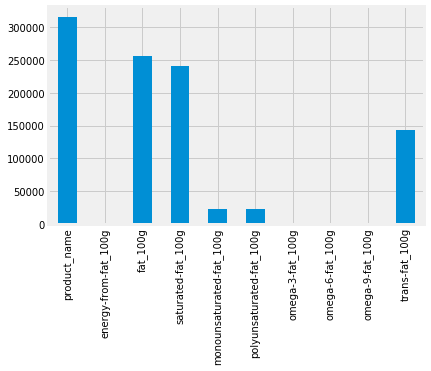

In [127]:
# plot present data for columns

df_fat.dropna(how='all').count().plot(kind='bar')
plt.xticks(rotation=90)

In [180]:
# grab labels for upcoming new columns

good_fat = ['monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'omega-6-fat_100g', 'omega-9-fat_100g' ]
bad_fat = ['saturated-fat_100g', 'trans-fat_100g']

In [202]:
# clean fat data. 

# drop columns with all null values
fat_null0 = df_fat.dropna(how='all').fillna(0)

# sum good and bad fats into aggregated columns

fat_null0['good_fat'] = fat_null0[good_fat].sum(1)
fat_null0['bad_fat'] = fat_null0[good_fat].sum(1)

# set product_name column as index

fat_null0.set_index('product_name')

,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,trans-fat_100g,good_fat,bad_fat
product_name,,,,,,,,,,,
Farine de blé noir,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Banana Chips Sweetened (Whole),0.0,28.57,28.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Peanuts,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Organic Salted Nut Mix,0.0,57.14,5.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Organic Polenta,0.0,1.43,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Breadshop Honey Gone Nuts Granola,0.0,18.27,1.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Organic Long Grain White Rice,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Organic Muesli,0.0,18.75,4.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Organic Dark Chocolate Minis,0.0,37.50,22.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
# inspect summary stats of cleaned data

fat_null0.describe()

,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,trans-fat_100g,good_fat,bad_fat
count,319438.000000,319438.000000,319438.000000,319438.000000,319438.000000,319438.000000,319438.000000,319438.000000,319438.000000,319438.000000,319438.000000
mean,1.570867,10.237942,3.869552,0.748777,0.454023,0.008705,0.009841,0.002642,0.032972,1.223988,1.223988
std,47.736839,16.572365,7.306965,5.309872,3.335950,0.338924,0.588294,0.381940,1.032245,7.855323,7.855323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.570000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.790000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,15.790000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3830.000000,714.290000,550.000000,557.140000,98.000000,60.000000,71.000000,75.000000,369.000000,614.280000,614.280000


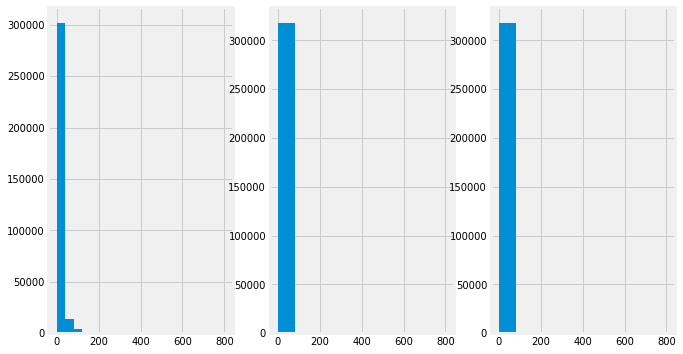

In [204]:
# plot aggregated fat columns as histogram

plt.subplots(1,3, figsize=(10,6))
plt.subplot(1,3,1)
fat_null0['fat_100g'].hist(bins=20, range=(0,800))
plt.subplot(1,3,2)
fat_null0['good_fat'].hist(bins=10, range=(0,800))
plt.subplot(1,3,3)
fat_null0['bad_fat'].hist(bins=10, range=(0,800))

# Findings

TBD